**Should you 'Sell in May and Go Away!'?**

**Introduction**

In the world of stock trading, a well-known adage exists: Sell in May and go away. The strategy suggests that investors should divest their equity holdings in May and re-enter the market at the end of October.

 This advice exists because more people are likely to take vacations during summer months. Ultimately, the result is low participation in the market, which makes it riskier to invest in.

Some investors and researchers have proven that this theory works while others feel it is better to stay in the market all year round.


With this project, we try to inspect the soundness of this advice.


> “*We look at the present through a rear-view mirror. We march backwards into the future*.” -Marshall Mcluhan


 The best way to check the validity of this strategy is to ask investors and have them confirm or deny it. But, it is not sensible.
Fortunately, this task is easier to execute with python coding and historical data.



By the end of the code, we will be able to conclude the effectiveness of this advice, and whether it works for all kinds of investors or not.





> **Methodology**: We will use python3 to process the data obtained from Fama-French.

**Our fundamental goals are threefold**: 

> First, we check whether seasonality has any effect on returns and volatility of the market.

> Second, we will analyze this strategy on a rolling basis to test whether certain parameters (return, risk, and risk-to-return ratio (sharpe ratio)) of this strategy defeat the market or not. 

> Finally, we will consider whether this strategy is still effective under the influence of specific circumstances (taxes, other special events).




>After research, our conclusion is that the strategy is ineffective, the following is our data-driven examine process.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import matplotlib.dates as mdates

In [25]:
plt.rcParams['figure.dpi'] = 150
np.set_printoptions(precision=4, suppress=True)
pd.options.display.float_format = '{:.4f}'.format

The data is sourced from FamaFrench. 

We firstly add the RF column to the Mkt-RF column to get the daily market returns for the previous years. 

To examine the effectiveness of the "Sell in May and Go Away" strategy, we calculate monthly average returns and standard deviations. Then, we group the daily data by months and annualize the data to make it more readable.

After this, we visualize the data for further analysis.

In [26]:
pdr.famafrench.get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

In [27]:
ff = pdr.get_data_famafrench('F-F_Research_Data_Factors_daily', start='1900')
ff = ff[0] / 100
ff['Mkt'] = ff['Mkt-RF'] + ff['RF']
ff_m = ff.groupby(by=lambda x: x.month)['Mkt'].agg(['mean', 'std'])

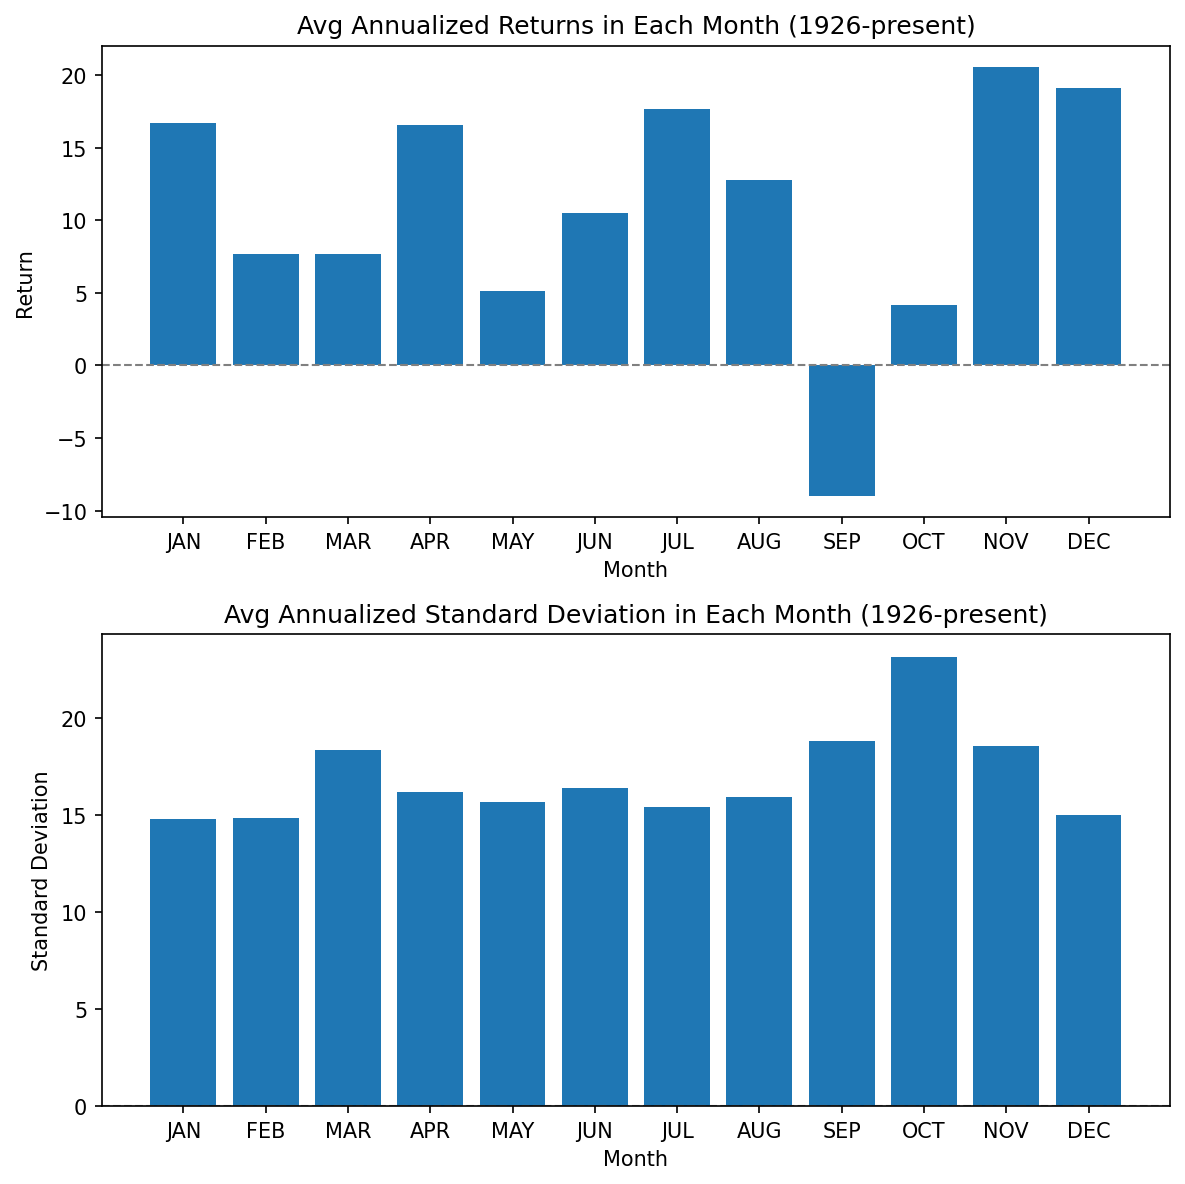

In [28]:
x1, x2 = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'],\
['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
y1, y2 = ff_m['mean']*100*252, ff_m['std']*100*np.sqrt(252)
titles = ['Avg Annualized Returns in Each Month (1926-present)', \
          'Avg Annualized Standard Deviation in Each Month (1926-present)']
x_labels = ['Month','Month']
y_labels = ['Return','Standard Deviation']
fig, axes = plt.subplots(nrows=2, figsize = (8,8))
x = [x1, x2]
y = [y1, y2]
labels = np.arange(1,13)
for ax, xi, yi, title, x_label, y_label in zip(axes, x, y, titles, x_labels, y_labels):
    ax.bar(xi, yi)
    ax.set_title(title)
    ax.axhline(y=0.00, c = 'grey', linestyle = '--',lw=1)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
plt.tight_layout()

From the chart above, we seem to have drawn some vague conclusions.

 From the first chart on the yield, we can see the highest yield in November and the lowest in September, which seems to be consistent with the trading strategy. 
 
The same is true for the second chart on standard deviation. October, which belongs to the summer, has the largest standard deviation, which is the highest risk.

But the current observations are not enough to prove the accuracy of this trading strategy, so we need to further analyze the data.

Next, we segregate the months into two season groups. 

Summer is from May to October, and winter is from November to May of the following year. In this way, we can compare investing in the winter with investing in the summer, which is more helpful to draw our final conclusions.

 In addition, we also consider the impact of different investment periods on this issue. We set different investment periods of one day, one month, six months, five years, ten years, and twenty years and we visualize the data.

In [29]:
def get_season(x):
    return 'Summer' if (x.month >= 5) & (x.month <= 10) else 'Winter'

In [30]:
ff_daily = ff.groupby(by=get_season)['Mkt'].agg(['mean', 'std']).\
rename(columns={"mean": 'mean_daily', 'std':'std_daily'})

In [31]:
ff_1m =ff.groupby(by=get_season)['Mkt'].resample('M').agg(['mean', 'std'])
ff_1m=ff_1m.reset_index(level=[0,1]).rename(columns={"level_0": 'Season', "mean": 'mean_1m', 'std':'std_1m'})\
.groupby(by='Season').mean()

In [32]:
ff_6m =ff.groupby(by=get_season)['Mkt'].resample('6M').agg(['mean', 'std'])
ff_6m=ff_6m.reset_index(level=[0,1]).rename(columns={"level_0": 'Season', "mean": 'mean_6m', 'std':'std_6m'})\
.groupby(by='Season').mean()

In [33]:
ff_5y = ff.groupby(by=get_season)['Mkt'].resample('5Y').agg(['mean', 'std'])
ff_5y=ff_5y.reset_index(level=[0,1]).rename(columns={"level_0": 'Season', "mean": 'mean_5y', 'std':'std_5y'})\
.groupby(by='Season').mean()

In [34]:
ff_10y = ff.groupby(by=get_season)['Mkt'].resample('10Y').agg(['mean', 'std'])
ff_10y=ff_10y.reset_index(level=[0,1]).rename(columns={"level_0": 'Season', "mean": 'mean_10y', 'std':'std_10y'})\
.groupby(by='Season').mean()

In [35]:
ff_20y = ff.groupby(by=get_season)['Mkt'].resample('20Y').agg(['mean', 'std'])
ff_20y=ff_20y.reset_index(level=[0,1]).rename(columns={"level_0": 'Season',"mean": 'mean_20y', 'std':'std_20y'})\
.groupby(by='Season').mean()

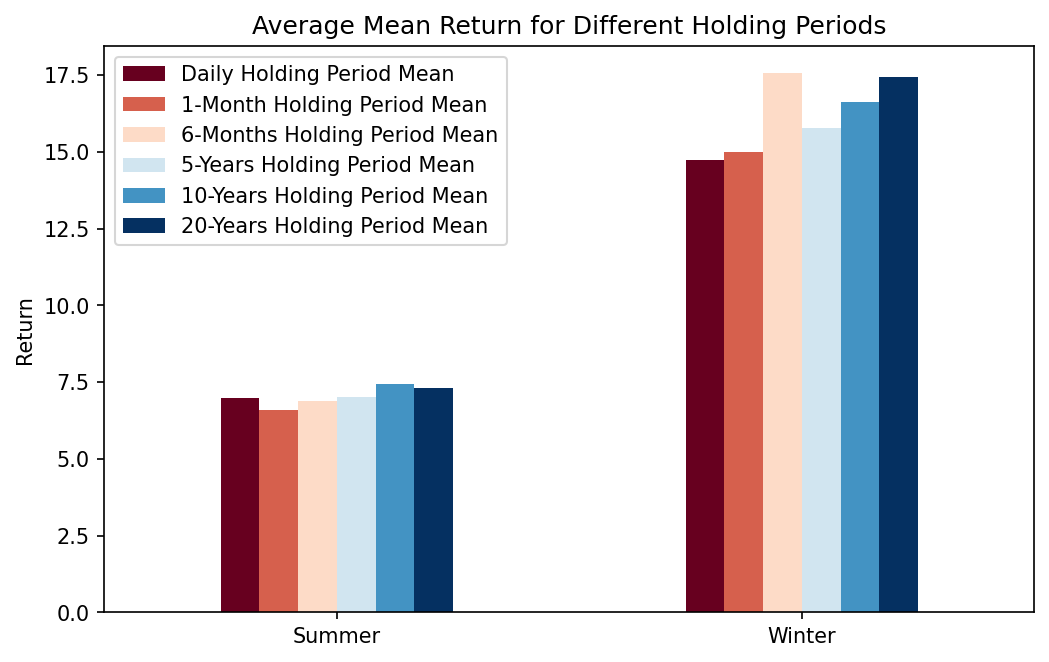

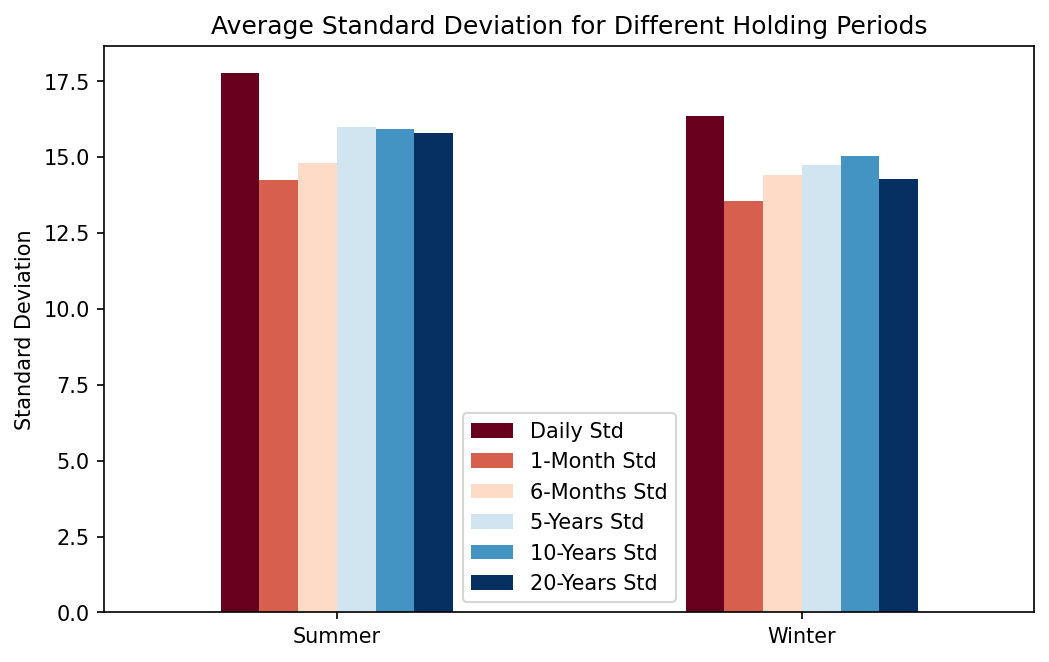

In [36]:
Holding_Periods = pd.concat([ff_daily, ff_1m,ff_6m, ff_5y,ff_10y, ff_20y],axis=1)
annualized_R = Holding_Periods.iloc[:,0::2]*100*252
annualized_std = Holding_Periods.iloc[:,1::2]*100 * np.sqrt(252)
plt1 = annualized_R.plot(kind='bar', title='Average Mean Return for Different Holding Periods', \
                  ylabel = 'Return', rot=0, colormap = 'RdBu', figsize = (8,5))
plt1.legend(['Daily Holding Period Mean', '1-Month Holding Period Mean', \
            '6-Months Holding Period Mean', '5-Years Holding Period Mean', '10-Years Holding Period Mean',\
           '20-Years Holding Period Mean'])
plt2= annualized_std.plot(kind='bar', title='Average Standard Deviation for Different Holding Periods', \
                    ylabel= 'Standard Deviation', rot=0, colormap = 'RdBu',figsize = (8,5))
plt2.legend(['Daily Std', '1-Month Std', '6-Months Std', '5-Years Std', '10-Years Std',\
           '20-Years Std'])

Now we seem to have a clearer conclusion. From the first chart, the average return on investment in winter is significantly greater than that on investment in summer. The same is true for the second chart. Although the difference is not as obvious as the first chart, we can still say that the risk of investing in winter is less than the risk of investing in summer. 
 
From the perspective of investment time, the investment time of 6 months has the highest rate of return. 
 
In comparison with other investment durations, we can say that as the investment time lengthens, our average rate of return will increase. At the risk level, the daily risk is the highest, and the risk for other durations is first increased and then decreased.

From the above analysis, we can draw a conclusion that investing in winter is a better choice than investing in summer, which is exactly what “Sell in May and Walk Away” expresses. However, can this trading strategy achieve higher returns or a better risk-to-return ratio than the simple “buy and hold” strategy(beat the market)? Next, we will test this on the basis of the rolling investment.


In [37]:
ff['R_SIM'] = np.where(ff.index.month.isin([11, 12, 1, 2, 3, 4]), ff['Mkt'], ff['RF'])

Text(0, 0.5, 'Return')

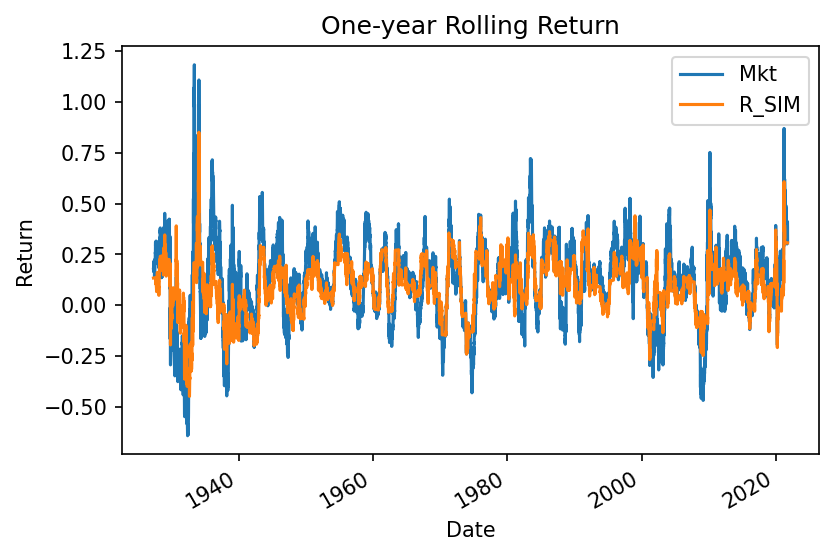

In [38]:
(np.exp(np.log1p(ff[['Mkt', 'R_SIM']]).rolling(252).sum()) - 1).plot()
plt.title("One-year Rolling Return")
plt.ylabel("Return")

Text(0, 0.5, 'Return')

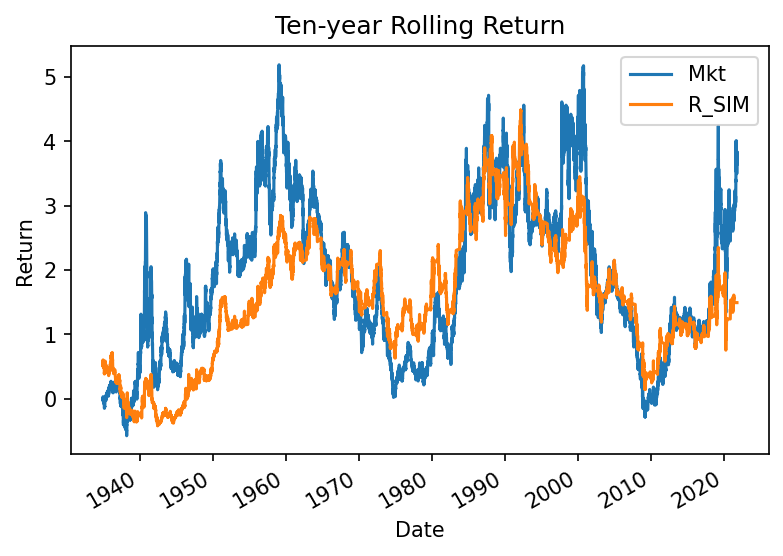

In [39]:
(np.exp(np.log1p(ff[['Mkt', 'R_SIM']]).rolling(2520).sum()) - 1).plot()
plt.title("Ten-year Rolling Return")
plt.ylabel("Return")




First of all, we plot the one-year rolling return and ten-year rolling return for both market and investing in winter strategy. From these two figures, we can see that for the short term, the investment return of adopting this strategy is very close to that of not adopting this strategy. The only difference is that the investment in winter will miss some market peaks, but the good side is that it also avoids some market troughs.
 
From the long-term chart, we have reached the opposite conclusion from the first step. On a ten-year rolling basis, most of the time, the market return is much greater than the return of investing in the winter. Since around 2000, the returns of these two strategies have become very similar again.

Text(0, 0.5, 'Sharp Ratio')

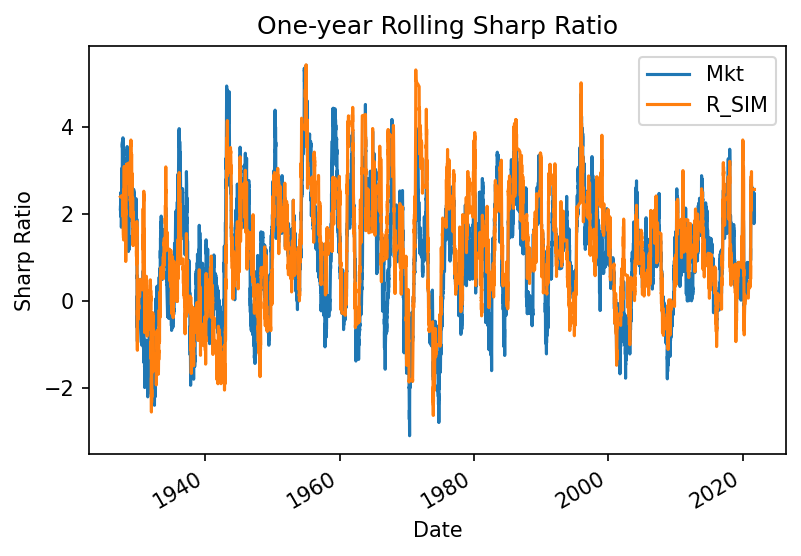

In [40]:
ff[['Mkt', 'R_SIM']].rolling(252).apply(lambda x: np.sqrt(252) * x.mean() / x.std()).plot()
plt.title("One-year Rolling Sharp Ratio")
plt.ylabel("Sharp Ratio")



Text(0, 0.5, 'Sharp Ratio')

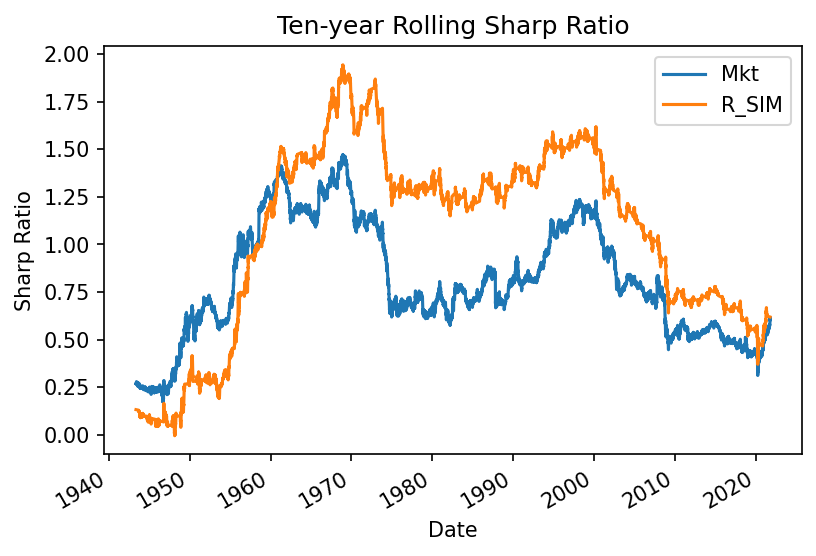

In [41]:
ff[['Mkt', 'R_SIM']].rolling(2520*2).apply(lambda x: np.sqrt(252) * x.mean() / x.std()).plot()
plt.title("Ten-year Rolling Sharp Ratio")
plt.ylabel("Sharp Ratio")

For the Sharpe ratio, the observation from the chart is differnet from that of above. In the one-year rolling sharpe ratio chart, the ratios of these two investment strategies are very close. However, in the ten-year rolling chart, since 1960, the Sharpe ratio of the strategy has been higher than the Sharpe ratio of market. That is to say, the strategy rewards more than the market for the same level of risk. Although the return of this strategy is lower than the return of the market, its smaller volatility provides a better risk-return-tradeoff, so the sharp ratio of this strategy is higher.

**Special Events**:

**1) Impact of elections on seasonality**:

In [42]:
# We are adding the seasonality and taking out year from the Datetime
by_month=ff
by_month['months']=by_month.index.month
by_month['season']=None
by_month.loc[by_month.months.between(5,10),'season']='May-Oct'
by_month.loc[~by_month.months.between(5,10),'season']='Nov-Apr'
by_month['year']=by_month.index.year
by_month.head()

,Mkt-RF,SMB,HML,RF,Mkt,R_SIM,months,season,year
Date,,,,,,,,,
1926-07-01,0.0010,-0.0023,-0.0028,0.0001,0.0011,0.0001,7,May-Oct,1926
1926-07-02,0.0045,-0.0034,-0.0003,0.0001,0.0046,0.0001,7,May-Oct,1926
1926-07-06,0.0017,0.0029,-0.0038,0.0001,0.0018,0.0001,7,May-Oct,1926
1926-07-07,0.0009,-0.0059,0.0000,0.0001,0.0010,0.0001,7,May-Oct,1926
1926-07-08,0.0021,-0.0038,0.0018,0.0001,0.0022,0.0001,7,May-Oct,1926


In [43]:

election_years=[1924,1928,1932,1936,1940,1944,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020]
by_month['election_years']=False
by_month.loc[by_month.year.isin(election_years),'election_years']=True
by_month.head()

,Mkt-RF,SMB,HML,RF,Mkt,R_SIM,months,season,year,election_years
Date,,,,,,,,,,
1926-07-01,0.0010,-0.0023,-0.0028,0.0001,0.0011,0.0001,7,May-Oct,1926,False
1926-07-02,0.0045,-0.0034,-0.0003,0.0001,0.0046,0.0001,7,May-Oct,1926,False
1926-07-06,0.0017,0.0029,-0.0038,0.0001,0.0018,0.0001,7,May-Oct,1926,False
1926-07-07,0.0009,-0.0059,0.0000,0.0001,0.0010,0.0001,7,May-Oct,1926,False
1926-07-08,0.0021,-0.0038,0.0018,0.0001,0.0022,0.0001,7,May-Oct,1926,False


In [44]:
election=by_month.drop(['Mkt-RF','SMB','HML','RF','months','year','R_SIM'],axis=1)

In [45]:
election.head()

,Mkt,season,election_years
Date,,,
1926-07-01,0.0011,May-Oct,False
1926-07-02,0.0046,May-Oct,False
1926-07-06,0.0018,May-Oct,False
1926-07-07,0.0010,May-Oct,False
1926-07-08,0.0022,May-Oct,False


<AxesSubplot:title={'center':'Mean of Non Election Years vs Election Years'}, xlabel='election_years'>

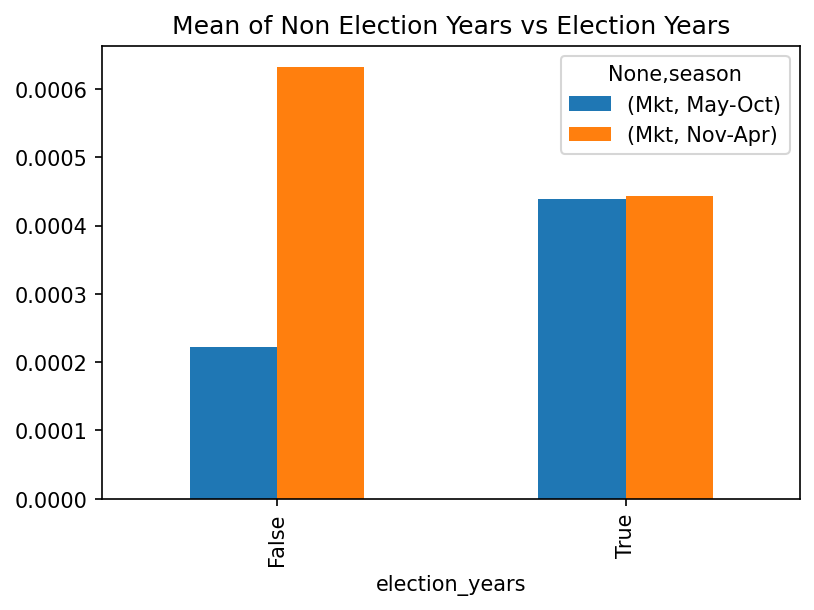

In [46]:
pd.DataFrame(election.groupby(['election_years','season'])['Mkt'].mean()).unstack().plot(kind='bar',title='Mean of Non Election Years vs Election Years')

<AxesSubplot:title={'center':'Standard Deviation of Non Election Years vs Election Years'}, xlabel='election_years'>

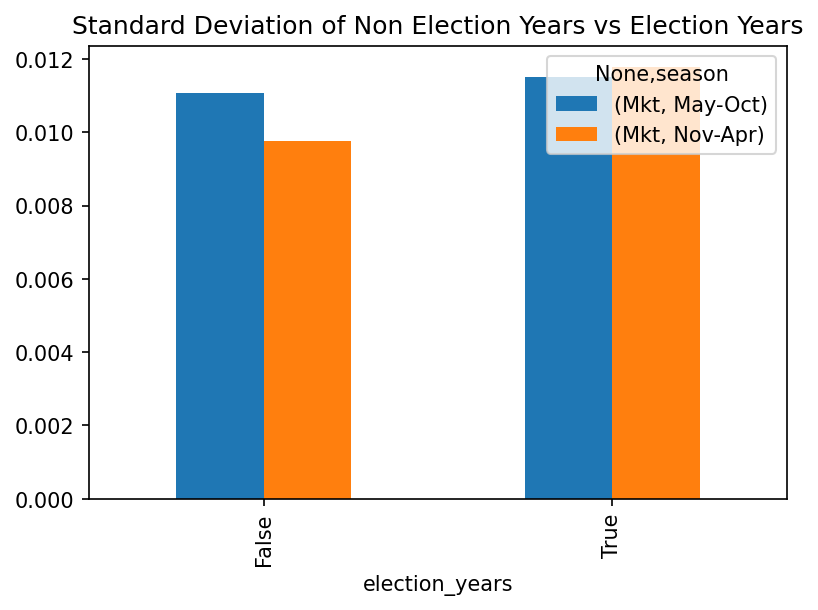

In [47]:
pd.DataFrame(election.groupby(['election_years','season'])['Mkt'].std()).unstack().plot(kind='bar',title='Standard Deviation of Non Election Years vs Election Years')

**2) Impact of pandemics on seasonality**:

In [48]:
pandemic_year=[1958, 1968, 2009, 2020]
by_month['pandemic_year']=False
by_month.loc[by_month.year.isin(pandemic_year),'pandemic_year']=True
by_month.head()

,Mkt-RF,SMB,HML,RF,Mkt,R_SIM,months,season,year,election_years,pandemic_year
Date,,,,,,,,,,,
1926-07-01,0.0010,-0.0023,-0.0028,0.0001,0.0011,0.0001,7,May-Oct,1926,False,False
1926-07-02,0.0045,-0.0034,-0.0003,0.0001,0.0046,0.0001,7,May-Oct,1926,False,False
1926-07-06,0.0017,0.0029,-0.0038,0.0001,0.0018,0.0001,7,May-Oct,1926,False,False
1926-07-07,0.0009,-0.0059,0.0000,0.0001,0.0010,0.0001,7,May-Oct,1926,False,False
1926-07-08,0.0021,-0.0038,0.0018,0.0001,0.0022,0.0001,7,May-Oct,1926,False,False


In [49]:
covid=by_month
covid=by_month.drop(['year','election_years','Mkt-RF','SMB','HML','RF','months','R_SIM'], axis = 1)
covid.head()

,Mkt,season,pandemic_year
Date,,,
1926-07-01,0.0011,May-Oct,False
1926-07-02,0.0046,May-Oct,False
1926-07-06,0.0018,May-Oct,False
1926-07-07,0.0010,May-Oct,False
1926-07-08,0.0022,May-Oct,False


<AxesSubplot:title={'center':'Mean of Non pandemic year vs pandemic year'}, xlabel='pandemic_year'>

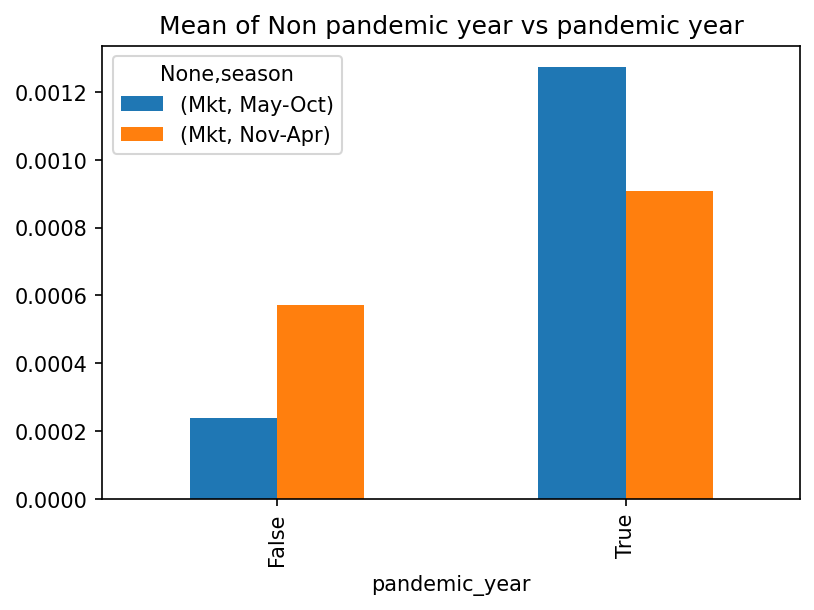

In [50]:
pd.DataFrame(covid.groupby(['pandemic_year','season'])['Mkt'].mean()).unstack().plot(kind='bar',title='Mean of Non pandemic year vs pandemic year')

<AxesSubplot:title={'center':'Standard Deviation of Non pandemic year vs pandemic year'}, xlabel='pandemic_year'>

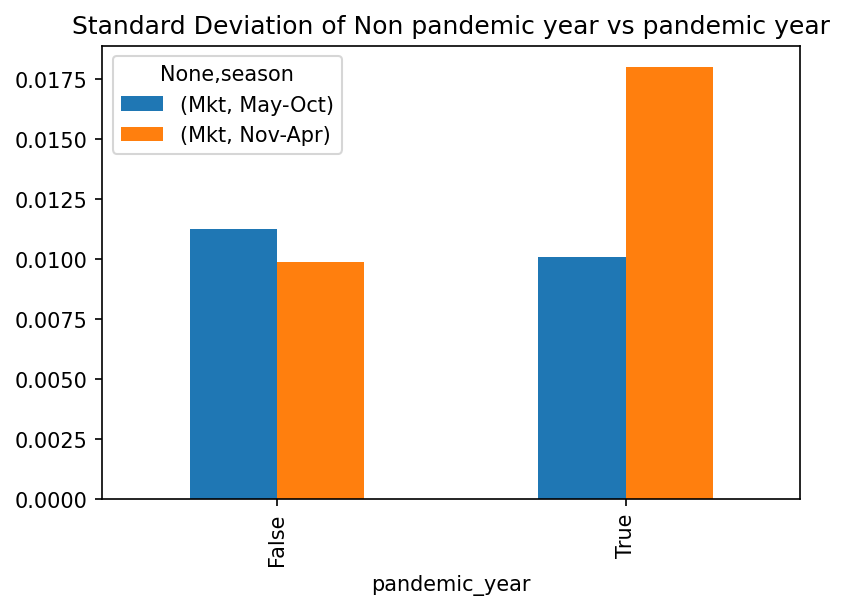

In [51]:
pd.DataFrame(covid.groupby(['pandemic_year','season'])['Mkt'].std()).unstack().plot(kind='bar',title='Standard Deviation of Non pandemic year vs pandemic year')

From the above code we can see that during certain events, like pandemics and election years, the mentioned strategy does not work. 
For election years, seasonality does not affect the mean and standard deviation of the market.
While, with pandemic years, seasonality affects in the opposite way, i.e., in winter months, mean and standard deviation is less in comparison to the summer months. 
So, we can conclude that "sell in May" strategy does not always hold true.

**3) Impact of taxes**:


Since we consider the tax during our trading, we could get a lower return after taxes. First, we will plot the changes of average annualized returns after taxes in different holding periods. Then, we will compare the volatility between market and strategy returns to check if the taxes will affect the relationship between them in the short term (6 months) and long term (10 years).


In [52]:
ff_1d = ff['Mkt'].agg(['mean', 'std'])
ff_1m = ff['Mkt'].resample('M').agg(['mean']).mean()
ff_6m = ff['Mkt'].resample('6M').agg(['mean']).mean()
ff_5y = ff['Mkt'].resample('5Y').agg(['mean']).mean()
ff_10y = ff['Mkt'].resample('10Y').agg(['mean']).mean()
ff_20y = ff['Mkt'].resample('20Y').agg(['mean']).mean()

In [53]:
ff_1d_taxed = ff['Mkt'].agg(['mean'])*(1-0.35)
ff_1m_taxed = ff['Mkt'].resample('M').agg(['mean']).mean()*(1-0.35)
ff_6m_taxed = ff['Mkt'].resample('6M').agg(['mean']).mean()*(1-0.35)
ff_5y_taxed = ff['Mkt'].resample('5Y').agg(['mean']).mean()*(1-0.15)
ff_10y_taxed = ff['Mkt'].resample('10Y').agg(['mean']).mean()*(1-0.15)
ff_20y_taxed = ff['Mkt'].resample('20Y').agg(['mean']).mean()*(1-0.15)

In [54]:
import matplotlib.pyplot as plt


labels = ['1 day','1 month', '6 month', '5 year', '10 year', '20 year']

means = np.multiply(100*252,[ff_1d['mean'],ff_1m['mean'], ff_6m['mean'], ff_5y['mean'], ff_10y['mean'], ff_20y['mean']])
taxed_means = np.multiply(100*252,[ff_1d_taxed['mean'],ff_1m_taxed['mean'], ff_6m_taxed['mean'], ff_5y_taxed['mean'], ff_10y_taxed['mean'], ff_20y_taxed['mean']])


width = 0.35       # the width of the bars: can also be len(x) sequence

Text(0, 0.5, 'Return')

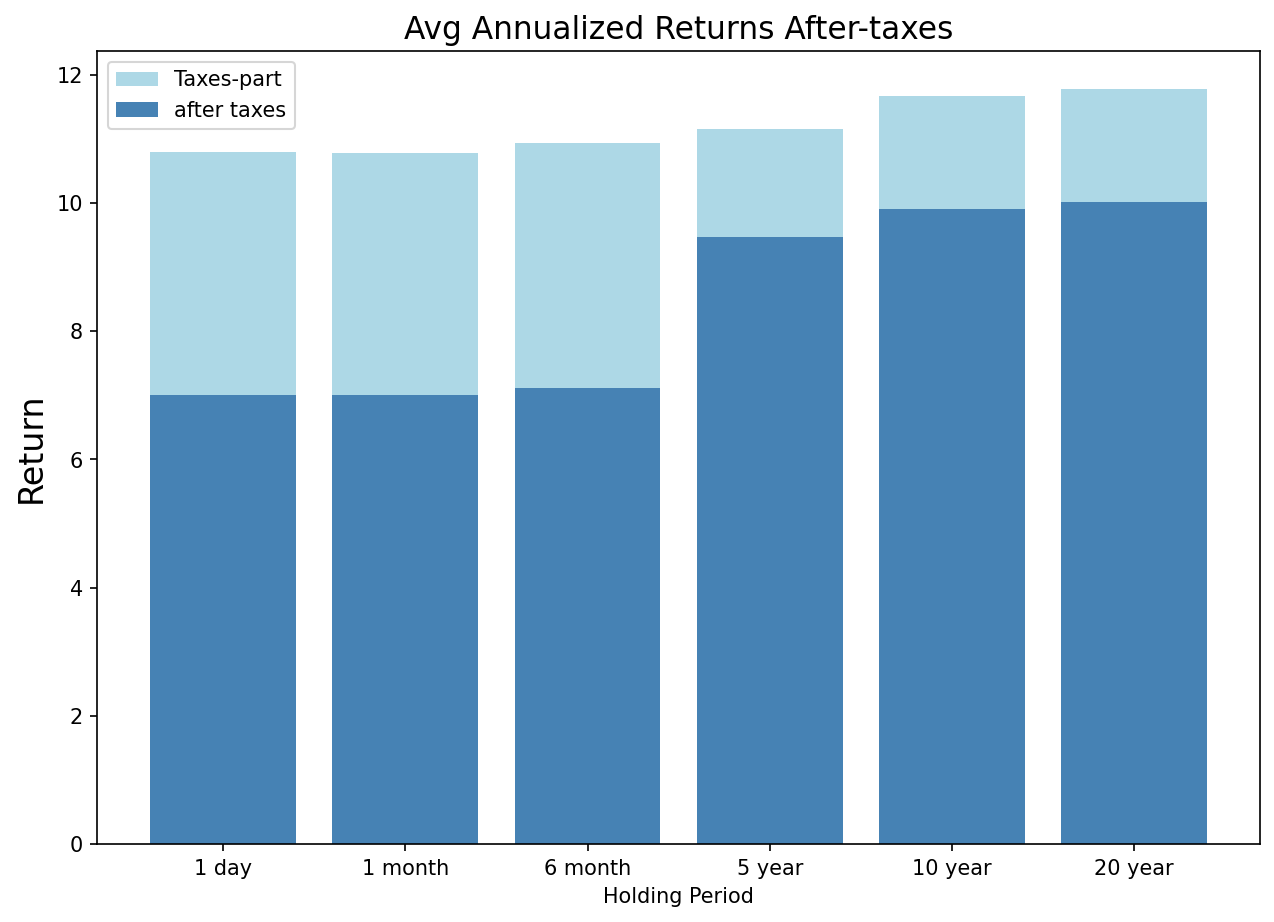

In [55]:
fig, ax = plt.subplots(figsize=(10, 7)) 
ax.bar(x=labels, height=means,label='Non-tax',color="lightblue",linewidth=2.0)

ax.bar(x=labels, height=taxed_means,label='tax',color="steelblue", )
ax.legend(['Taxes-part','after taxes'])
ax.set_title("Avg Annualized Returns After-taxes", fontsize=15)
ax.set_xlabel("Holding Period")
ax.set_ylabel("Return",fontsize=16)

Now we find the tax does not really affect the relationship of the average annualized returns in different holding periods. Short term trading will count in more frequency of taxes than long term trading, so we need to pay more taxes in the short term. Finally, short term average annualized returns are still lower than long term average annualized returns. So the taxes will not influence the relationship of annualized average returns between long term and short term, but it is true that short term trading will be more susceptible to the impact of taxes.


In [56]:
ff['R_SIM'] = np.where(ff.index.month.isin([11, 12, 1, 2, 3, 4]), ff['Mkt'], ff['RF'])

In [57]:
ff_6m_Mkt = (1 + ff[['Mkt', 'RF']]).resample('M').apply(lambda x: x.prod()).rolling(6).apply(lambda x: x.prod()) - 1
ff_6m_Mkt_taxed = (1 + ff[['Mkt', 'RF']]).resample('M').apply(lambda x: x.prod()).rolling(6).apply(lambda x: x.prod()*(1-0.35)) - 1
ff_6m_SIM = ff_6m_Mkt.loc[ff_6m_Mkt.index.month.isin([11, 12, 1, 2, 3, 4])]
ff_6m_SIM_taxed = ff_6m_Mkt_taxed.loc[ff_6m_Mkt.index.month.isin([11, 12, 1, 2, 3, 4])]

Text(0.5, 1.0, '6 Month Rolling Returns Compare with After-taxes')

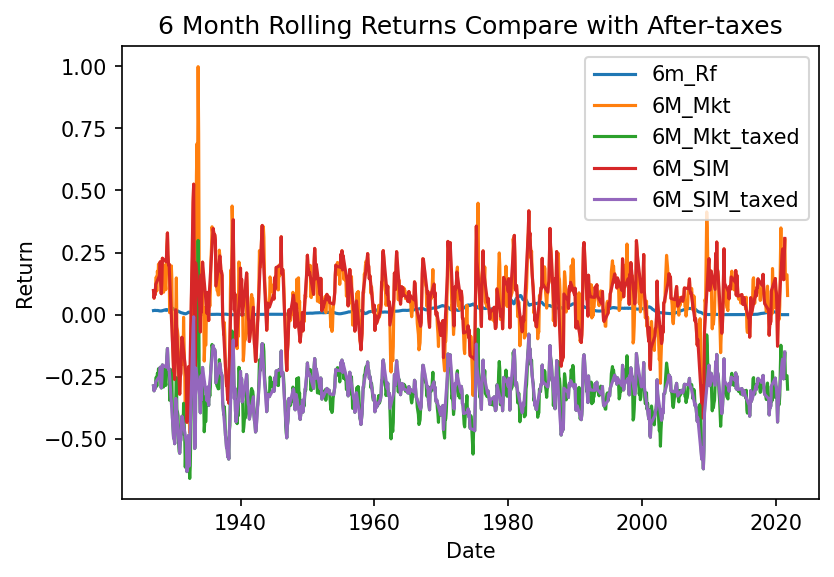

In [58]:

from matplotlib import pyplot
import matplotlib.pyplot as plt

x1 = ff_6m_Mkt.index
x2 = ff_6m_SIM.index

plt.plot(x1, ff_6m_Mkt['RF'],label='6m_Rf')
plt.plot(x1, ff_6m_Mkt['Mkt'],label='6M_Mkt')
plt.plot(x1, ff_6m_Mkt_taxed['Mkt'],label='6M_Mkt_taxed')

plt.plot(x2, ff_6m_SIM['Mkt'],label='6M_SIM')
plt.plot(x2, ff_6m_SIM_taxed['Mkt'],label='6M_SIM_taxed')

plt.legend(loc='upper right') 
plt.xlabel('Date')
plt.ylabel("Return")
plt.title("6 Month Rolling Returns Compare with After-taxes")

From the short-term chart, we find that the volatility is moving lower and closer. But the relationship between market and "Sell in May" strategy does not change much. So, taxes do not affect the decision to go for this strategy in the short term.


In [59]:
ff_10y_Mkt = (1 + ff[['Mkt', 'RF']]).resample('M').apply(lambda x: x.prod()).rolling(120).apply(lambda x: x.prod()) - 1
ff_10y_Mkt_taxed = (1 + ff[['Mkt', 'RF']]).resample('M').apply(lambda x: x.prod()).rolling(120).apply(lambda x: x.prod()*(1-0.15)) - 1
ff_10y_SIM = ff_10y_Mkt.loc[ff_10y_Mkt.index.month.isin([11, 12, 1, 2, 3, 4])]
ff_10y_SIM_taxed = ff_10y_Mkt_taxed.loc[ff_10y_Mkt_taxed.index.month.isin([11, 12, 1, 2, 3, 4])]

Text(0.5, 1.0, '10 Years Rolling Returns Compare with After-taxes')

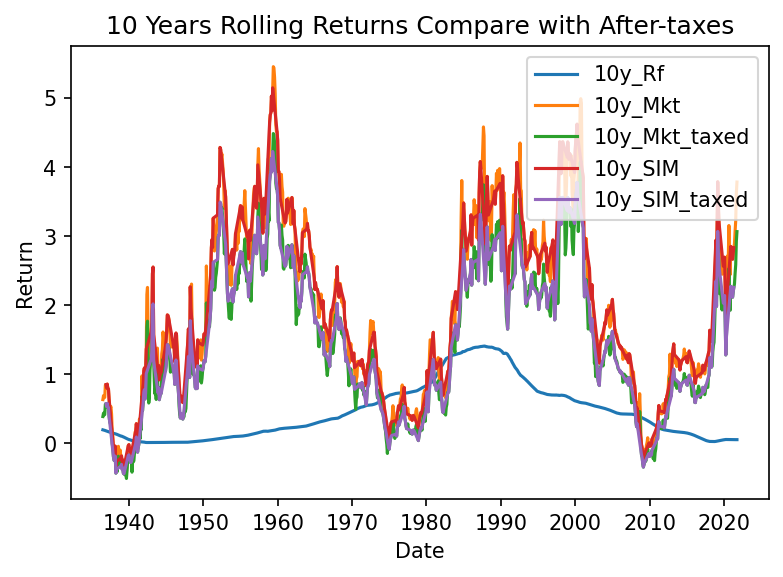

In [60]:
x1 = ff_10y_Mkt.index
x2 = ff_10y_SIM.index

plt.plot(x1, ff_10y_Mkt['RF'],label='10y_Rf')
plt.plot(x1, ff_10y_Mkt['Mkt'],label='10y_Mkt')
plt.plot(x1, ff_10y_Mkt_taxed['Mkt'],label='10y_Mkt_taxed')

plt.plot(x2, ff_10y_SIM['Mkt'],label='10y_SIM')
plt.plot(x2, ff_10y_SIM_taxed['Mkt'],label='10y_SIM_taxed')

plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel("Return")
plt.title("10 Years Rolling Returns Compare with After-taxes")

And for the long-term chart the conclusion is close to the previous one. The volatility is moving slowly and closer. The relationship between market and strategy returns does not change much after taxes. So taxes will not change our conclusions in the long term as well.


To sum up, taxes will not have much impact on our decision to take up this strategy or not. 

**Conclusion** 

From all the analysis above, we can tell that the strategy of “sell in May and walk away” has severe problems. It did not clearly defeat the market, and it did not have an effect when certain events occurred. In addition, simply adopting this strategy also causes us to miss many market peaks, which makes us to take high opportunity costs. Based on the above reasons, our final conclusion is that this strategy is ineffective.
